
# Árboles de Decisión

Los __árboles de decisión__ son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

__Ventajas__

- Los árboles son fáciles de interpretar aun cuando las relaciones entre predictores son complejas.
- Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos.
- No se ven muy influenciados por outliers.
- Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
- Pueden aplicarse a problemas de regresión y clasificación.

__Desventajas__

- Su tendencia al overfitting y alta varianza. Sin embargo, existen técnicas más complejas que, haciendo uso de la combinación de múltiples árboles (bagging, random forest, boosting), consiguen mejorar en gran medida este problema.
- Son sensibles a datos de entrenamiento desbalanceados (una de las clases domina sobre las demás).
- No son capaces de extrapolar fuera del rango de los predictores observado en los datos de entrenamiento.

__Implementados en sk-learn__ en las clases __DecissionTreeClassifier__ y __DecissionTreeRegressor__ 

__Obtención del árbol de decisión__

La entropía es una forma de cuantificar el desorden de un sistema. En el caso de los nodos, el desorden se corresponde con la impureza. Si un nodo es puro, contiene únicamente observaciones de una clase, su entropía es cero. Por el contrario, si la frecuencia de cada clase es la misma, el valor de la entropía alcanza el valor máximo de 1.

$$D=-\displaystyle\sum_{k=1}^K p_{mk}log_2(p_{mk})$$

Donde $p_{mk}$ representa la proporción de observaciones del nodo $m$ que pertenecen a la clase $k$.

## Clasificar con sk-learn el conjunto Iris mediante un árbol de decisión

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Inicialmente se divide el conjunto de datos de entrada en Entrenamiento (75%) y Validación (25%). Conjuntos Train y Test

In [17]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,0:4], df.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

### Utilizamos el clasificador DecisionTreeClassifier de sklearn

Usa como criterio  por defecto __gini__, que es la __Impureza de Gini__ y se puede configurar __entropy__

La __Impureza de Gini__ ($I_G$) viene definida por:

$$I_G=1-\displaystyle\sum_{k=1}^K p^2_{mk}$$

$I_G$ en aquellos nodos puros, con una única etiqueta, vale cero.


In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.947


#### Y la correspondiente matriz de confusión

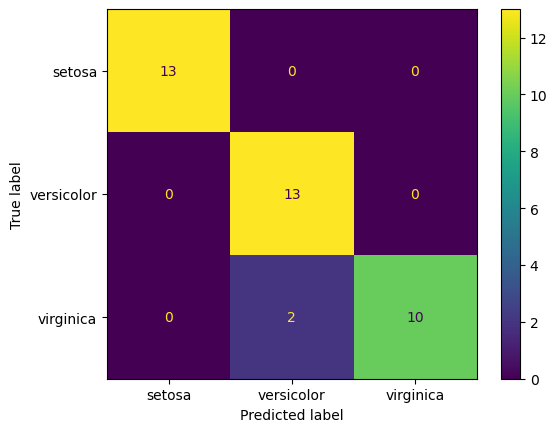

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=iris['target_names']).plot()

### Visualización del árbol de decisión

Mediante la librería __PyDotPlus__ es posible visualizar el árbol de decisión entrenado

Para poder usar esta librería es preciso realizar la siguiente instalación

- pip install pydotplus

O desde Anaconda:

- conda install pydotplus

Para funcionar correctamente necesitamos que en nuestra máquina esté instalado Graphviz, si no es así se puede hacer que conda lo instale al mismo tiempo que el paquete si se usa el comando:

- conda install -c conda-forge pydotplus

La documentación de la librería está disponible en: http://pydotplus.readthedocs.org/

In [20]:
##conda install -c conda-forge pydotplus
print("# All requested packages already installed.")

# All requested packages already installed.


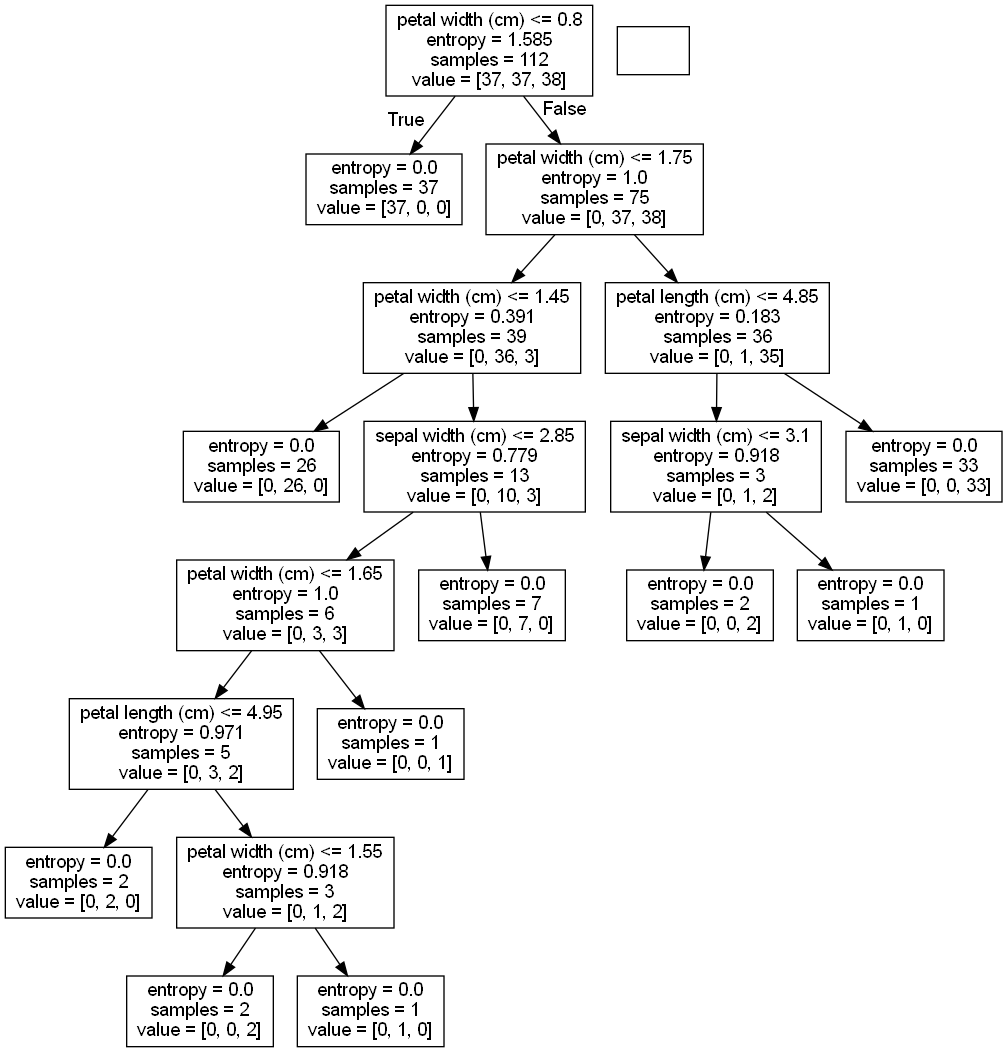

In [21]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython import display
dot_data = export_graphviz(clf,
                           feature_names=iris.feature_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('./images/tree_iris.png')
display.Image("./images/tree_iris.png", width="700")

## Comprobación de los cálculos de entropía

Verificamos la entropia asociada al valor __petal width < 0.8__. Para ello se filtran las etiquetas que cumplen esa condición, se cuentan los diferentes valores y se calcula su logaritmo en cada una de las dos ramas

In [22]:
import numpy as np
def getEntropia(y):
    y = np.asarray(y)
    entropia = 0
    for et in np.unique(y):
        fr = np.size(y[y==et])/np.size(y)
        entropia += - fr*np.log2(fr)
        
    return entropia

getEntropia([0,1,2,3,4,5]), getEntropia([0,0,0,1,1,1]), getEntropia([1,1,1])

(2.584962500721156, 1.0, 0.0)

In [23]:
import numpy as np
def getEntropy(y, clasNames):
    etiq = np.unique(y)
    samples = np.size(y)
    entropy = 0
    value=[]
    clases=[]
    for we in etiq: 
        n_we = np.size(y[y==we])  ## Número de valores de esa etiqueta
        value.append(n_we)
        clases.append(clasNames[int(we)])
        fr = n_we/samples   ## Frecuencia de esta etiqueta
        entropy += - fr*np.log2(fr)  ## Aporte de entropia de esta frecuencia
    return entropy, samples, value, clases

In [24]:
dat_entr = getEntropy(y_train, iris['target_names'])
print("Entropia del conjunto raiz=", dat_entr[0], "\n", "samples=", dat_entr[1], "\n", "value=", dat_entr[2], "\n", "clases=", dat_entr[3], "\n")
dat_entr2 = getEntropy(y_train[X_train[:,3]<=0.8], iris['target_names'])
print("Entropia 1ª hoja izquierda=", dat_entr2[0], "\n", "samples=", dat_entr2[1], "\n", "value=", dat_entr2[2], "\n", "clases=", dat_entr2[3], "\n")
dat_entr3 = getEntropy(y_train[X_train[:,3]>0.8], iris['target_names'])
print("Entropia 1ª hoja derecha=", dat_entr3[0], "\n", "samples=", dat_entr3[1], "\n", "value=", dat_entr3[2], "\n", "clases=", dat_entr3[3], "\n")

Entropia del conjunto raiz= 1.5848478277058313 
 samples= 112 
 value= [37, 37, 38] 
 clases= ['setosa', 'versicolor', 'virginica'] 

Entropia 1ª hoja izquierda= 0.0 
 samples= 37 
 value= [37] 
 clases= ['setosa'] 

Entropia 1ª hoja derecha= 0.999871756640849 
 samples= 75 
 value= [37, 38] 
 clases= ['versicolor', 'virginica'] 



## Rutina que detecta el punto de mínima entropia en "_petal width_"


In [25]:
def minEntropy(feature, target):
    #primero = True
    min_entrop = 10**9
    min_x = min(feature)
    for x in feature:
        entrop = getEntropy(target[feature<=x], iris['target_names'])[0] + getEntropy(target[feature>x], iris['target_names'])[0]
        #print("entropias--->", x, entrop)
        #if (primero==True or entrop<min_entrop):
        if (entrop<min_entrop):
            min_x = x
            min_entrop = entrop
            #primero=False
    
    ## Se adopta el valor medio entre min_x y el siguiente valor de x
    min_x = (min_x + min(feature[feature>min_x]))/2
    print("Entropia mínima=", min_entrop, "valor de corte=", min_x)
    return min_x, min_entrop  ## Se retorna el valor de x que hace mínima la entropia en  la serie targe    

In [26]:
minEntropy(X_train[:,3], y_train)

Entropia mínima= 0.999871756640849 valor de corte= 0.8


(0.8, 0.999871756640849)

### Finalmente se programa una rutina que detecte la primera característica donde dividir el raíz


In [27]:
def firstFeatureSplit(Features, target):
    d = Features.shape[1] ## Se toma el número de características
    min_entrop = 0
    min_i = -1
    for i in range(d):
        entrop = minEntropy(Features[:,i], target)[1]
        print("entropias--->", i, entrop)
        if min_i == -1 or entrop<min_entrop:
            min_i=i
            min_entrop=entrop
    return min_i

In [28]:
i = firstFeatureSplit(X_train, y_train)
print("Característica de corte=", i, "-", iris.feature_names[i])

Entropia mínima= 1.5611819419397694 valor de corte= 4.85
entropias---> 0 1.5611819419397694
Entropia mínima= 1.5793251181375338 valor de corte= 3.8499999999999996
entropias---> 1 1.5793251181375338
Entropia mínima= 0.999871756640849 valor de corte= 2.45
entropias---> 2 0.999871756640849
Entropia mínima= 0.999871756640849 valor de corte= 0.8
entropias---> 3 0.999871756640849
Característica de corte= 2 - petal length (cm)


__Observaciones sobre el cálculo de la entropia__

La entropia se calcula únicamente considerando una lista de etiquetas. Si se tiene la lista

[1, 1, 0, 1, 0, 0, 0]

La frecuencia de la etiqueta 0 es $4/7$, la de la etiqueta 1 es $3/7$ y por tanto la entropia de la lista resulta:

$$-log_2(4/7) - log_2(3/7) \approx 2,03$$

<span style='color:Red'> <font size="4"> <b>Información Complementaria:</b> Comprender mejor el modelo de datos de DecisionTree </font> </span>

## Comprendiendo como almacena DecisionTree el modelo

El objecto que se crea con la clase __DecisionTreeClassifier__, que en este cuaderno se llama __clf__ tiene una variable de nombre <b>.tree_</b> en la que se tienen los siguientes atributos:

- __node_count__ : contador de nodos
- __children_left__ : ID con el nodo izquierdo
- __children_right__ : ID con el nodo derecho
- __feature__ : Posición de la característica en la matriz X
- __threshold__ : Valor que adopta la característica feature en la división

Cuando aparece un -1 en children_left y children_right no hay división y nos encontramos ante un nodo hoja. En los nodos hoja, en feature aparece un valor arbitrario sin significado.

In [29]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
children_left, children_right, feature, threshold

(array([ 1, -1,  3,  4, -1,  6,  7,  8, -1, 10, -1, -1, -1, -1, 15, 16, -1,
        -1, -1], dtype=int64),
 array([ 2, -1, 14,  5, -1, 13, 12,  9, -1, 11, -1, -1, -1, -1, 18, 17, -1,
        -1, -1], dtype=int64),
 array([ 3, -2,  3,  3, -2,  1,  3,  2, -2,  3, -2, -2, -2, -2,  2,  1, -2,
        -2, -2], dtype=int64),
 array([ 0.80000001, -2.        ,  1.75      ,  1.44999999, -2.        ,
         2.85000002,  1.65000004,  4.95000005, -2.        ,  1.55000001,
        -2.        , -2.        , -2.        , -2.        ,  4.85000014,
         3.10000002, -2.        , -2.        , -2.        ]))

In [31]:
children_left[1], children_right[1], feature[1], threshold[1]

(-1, -1, -2, -2.0)

Vamos a utilizar __una pila__ para almacenar la información del árbol y poder imprimirla posteriormente.

__Cuando construimos una pila sobre una lista, el método pop() suele usarse en conjunto con append() para implementar una funcionalidad básica de apilar en aplicaciones Python__

__pop()__ extrae el dato de la pila y nos aseguramos que se visita una única vez

__append()__ añade elementos a la pila

In [30]:
## 1) CARGAMOS UNA PILA CON ID_NODO Y PROFUNDIDAD
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
## En stack apilamos el id del nodo y su profundidad. Empezamos iniciando la pila con el nodo raiz de profundidad 0
stack = [(0, 0)]  # empezamos con el nodo raíz id (0) y profunidad (0)
while len(stack) > 0:
    node_id, depth = stack.pop() # `pop` asegura que cada nodo sólo se visita una vez
    node_depth[node_id] = depth

    # Si el hijo izquierdo y derecho son distintos nos encontramos con un nodo división
    is_split_node = children_left[node_id] != children_right[node_id]
    # Si es un nodo división se añade a la lista el hijo izquierdo y derecho
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True  #De lo contrario estamos en una hoja

## 2) SE HACE PRINT A LA ESTRUCTURA DANDO UN SENTIDO A LA MISMA
print("La estructura de árbol binario tiene {n} nodos y tiene la siguiente estructura de árbol:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}nodo={node} es un nodo hoja.".format(space=node_depth[i] * "\t", node=i))
    else:
        print(
            "{space}nodo={node} es un nodo división: "
            "va del nodo {left} if X[:, {feature}] <= {threshold:.2f} "
            "else al nodo {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

La estructura de árbol binario tiene 19 nodos y tiene la siguiente estructura de árbol:

nodo=0 es un nodo división: va del nodo 1 if X[:, 3] <= 0.80 else al nodo 2.
	nodo=1 es un nodo hoja.
	nodo=2 es un nodo división: va del nodo 3 if X[:, 3] <= 1.75 else al nodo 14.
		nodo=3 es un nodo división: va del nodo 4 if X[:, 3] <= 1.45 else al nodo 5.
			nodo=4 es un nodo hoja.
			nodo=5 es un nodo división: va del nodo 6 if X[:, 1] <= 2.85 else al nodo 13.
				nodo=6 es un nodo división: va del nodo 7 if X[:, 3] <= 1.65 else al nodo 12.
					nodo=7 es un nodo división: va del nodo 8 if X[:, 2] <= 4.95 else al nodo 9.
						nodo=8 es un nodo hoja.
						nodo=9 es un nodo división: va del nodo 10 if X[:, 3] <= 1.55 else al nodo 11.
							nodo=10 es un nodo hoja.
							nodo=11 es un nodo hoja.
					nodo=12 es un nodo hoja.
				nodo=13 es un nodo hoja.
		nodo=14 es un nodo división: va del nodo 15 if X[:, 2] <= 4.85 else al nodo 18.
			nodo=15 es un nodo división: va del nodo 16 if X[:, 1] <